In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_excel('Germany_analysis.xlsx')
df.head(3)

,City,World_side,Population,Density,Air_quality_index,Unemployment_rate,Linkedinjobs_to_population,Price_1_m**2,Cold_rent,Cost_of_living,Salary_after_taxes,Free_money
0,Munich,South,1484226,4777,58,0.029,0.041085,23.296,1400,1500,3218.798689,319
1,Berlin,East,3769495,4227,73,0.091,0.018302,14.859,1200,1200,2764.190623,364
2,Frankfurt,West,763380,3074,63,0.049,0.061107,16.978,1100,1200,3107.894149,808


In [4]:
newdf = pd.DataFrame({
    'city': df['City'],
    'world_side': df['World_side'],
    'population': df['Population'],
    'population_mm': (df['Population']/1000000).round(2),
    'density': df['Density'],
    'air_quality': df['Air_quality_index'],
    'unemployment_(%)': round(df['Unemployment_rate']*100, 1),
    'linkjobs_to_pop_(%)': round(df['Linkedinjobs_to_population']*100, 1),
    'cold_rent': df['Cold_rent'],
    'cost_of_living': df['Cost_of_living'],
    'salary_net': df['Salary_after_taxes'].round().astype(int),
    'free_money': df['Free_money']
})
newdf.head(3)

,city,world_side,population,population_mm,density,air_quality,unemployment_(%),linkjobs_to_pop_(%),cold_rent,cost_of_living,salary_net,free_money
0,Munich,South,1484226,1.48,4777,58,2.9,4.1,1400,1500,3219,319
1,Berlin,East,3769495,3.77,4227,73,9.1,1.8,1200,1200,2764,364
2,Frankfurt,West,763380,0.76,3074,63,4.9,6.1,1100,1200,3108,808


In [5]:
newdf.insert(10, 'expenses', newdf['cold_rent']+newdf['cost_of_living']) # making expenses column (cost of living+cold rent)

In [6]:
newdf = newdf.sort_values('density', ascending=False)

In [7]:
newdf.columns

Index(['city', 'world_side', 'population', 'population_mm', 'density',
       'air_quality', 'unemployment_(%)', 'linkjobs_to_pop_(%)', 'cold_rent',
       'cost_of_living', 'expenses', 'salary_net', 'free_money'],
      dtype='object')

In [8]:
newdf[['density', 'air_quality', # looking for a correlation
       'unemployment_(%)', 'linkjobs_to_pop_(%)', 'cold_rent',
       'cost_of_living', 'expenses', 'salary_net', 'free_money']].corr().round(2)

,density,air_quality,unemployment_(%),linkjobs_to_pop_(%),cold_rent,cost_of_living,expenses,salary_net,free_money
density,1.00,0.38,-0.05,-0.63,0.64,0.84,0.75,0.58,-0.16
air_quality,0.38,1.00,-0.21,-0.28,0.29,0.28,0.30,0.36,0.13
unemployment_(%),-0.05,-0.21,1.00,-0.35,-0.19,-0.23,-0.22,-0.38,-0.28
linkjobs_to_pop_(%),-0.63,-0.28,-0.35,1.00,-0.19,-0.38,-0.27,-0.05,0.30
cold_rent,0.64,0.29,-0.19,-0.19,1.00,0.78,0.97,0.73,-0.22
cost_of_living,0.84,0.28,-0.23,-0.38,0.78,1.00,0.91,0.68,-0.21
expenses,0.75,0.30,-0.22,-0.27,0.97,0.91,1.00,0.76,-0.23
salary_net,0.58,0.36,-0.38,-0.05,0.73,0.68,0.76,1.00,0.47
free_money,-0.16,0.13,-0.28,0.30,-0.22,-0.21,-0.23,0.47,1.00


In [9]:
newdf.insert(5, 'air_quality_by_city', pd.cut(newdf['air_quality'], bins=3, labels=['best', 'medium', 'worst'])) # comparing AQ through all cities

In [10]:
newdf.insert(4, 'density_by_city', pd.cut(newdf['density'], bins=3, labels=['low', 'medium', 'high'])) # comparing density through all cities

In [11]:
newdf.insert(8, 'unemployment_by_city', pd.cut(newdf['unemployment_(%)'], bins=3, labels=['low', 'medium', 'high'])) # comparing unemployment_rate through all cities

In [12]:
newdf.insert(14, 'expenses_by_city', pd.cut(newdf['free_money'], bins=3, labels=['high', 'medium', 'low'])) # figuring out the most expensive cities

In [13]:
newdf.insert(10, 'linkjobs_by_city', pd.cut(newdf['linkjobs_to_pop_(%)'], bins=3, labels=['low', 'medium', 'high'])) # linkedin job distribution between cities

In [14]:
newdf.head(3)

,city,world_side,population,population_mm,density_by_city,density,air_quality_by_city,air_quality,unemployment_by_city,unemployment_(%),linkjobs_by_city,linkjobs_to_pop_(%),cold_rent,cost_of_living,expenses,expenses_by_city,salary_net,free_money
0,Munich,South,1484226,1.48,high,4777,best,58,low,2.9,low,4.1,1400,1500,2900,high,3219,319
1,Berlin,East,3769495,3.77,high,4227,medium,73,high,9.1,low,1.8,1200,1200,2400,high,2764,364
2,Frankfurt,West,763380,0.76,medium,3074,medium,63,low,4.9,medium,6.1,1100,1200,2300,medium,3108,808


In [15]:
newdf[newdf['expenses_by_city']=='high'].loc[:, ['city', 'free_money']].sort_values('free_money') 
# Cities with highest expenses in Germany

,city,free_money
7,Cologne,148
0,Munich,319
19,Bielefeld,348
1,Berlin,364
25,Erfurt,390
13,Leipzig,424
22,Lubeck,433
15,Bremen,452
21,Koblenz,464
24,Potsdam,483


In [16]:
newdf[newdf['density_by_city']=='high'].loc[:, ['city', 'density']] 
# the most popular cities in Germany

,city,density
0,Munich,4777
1,Berlin,4227


In [17]:
newdf[newdf['unemployment_by_city']=='high'].loc[:, ['city', 'unemployment_(%)']].sort_values('unemployment_(%)', ascending=False)
# Cities with highest unemployment rate

,city,unemployment_(%)
15,Bremen,10.6
1,Berlin,9.1


In [18]:
newdf[newdf['unemployment_by_city']=='low'].loc[:, ['city', 'unemployment_(%)']].sort_values('unemployment_(%)', ascending=True)
# Cities with lowest unemployment rate

,city,unemployment_(%)
0,Munich,2.9
5,Nuremberg,3.1
3,Stuttgart,3.6
14,Karlsruhe,3.8
17,Freiburg im Breisgau,3.9
18,Heidelberg,4.1
21,Koblenz,4.6
2,Frankfurt,4.9
19,Bielefeld,5.0
8,Hanover,5.4


(Text(0.5, 0, 'World_Side'), Text(0, 0.5, 'Unemployment_Rate_%'))

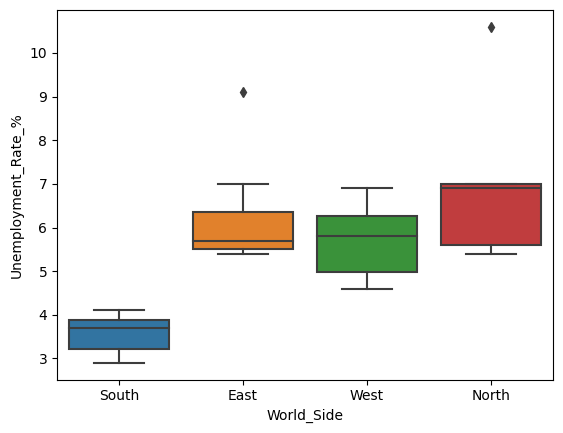

In [19]:
sns.boxplot(x='world_side', y='unemployment_(%)', data=newdf)
plt.xlabel('World_Side'), plt.ylabel('Unemployment_Rate_%')
# Southern Germany has the lowest unemployment_rate

(Text(0.5, 0, 'World_Side'), Text(0, 0.5, 'Air_Quality'))

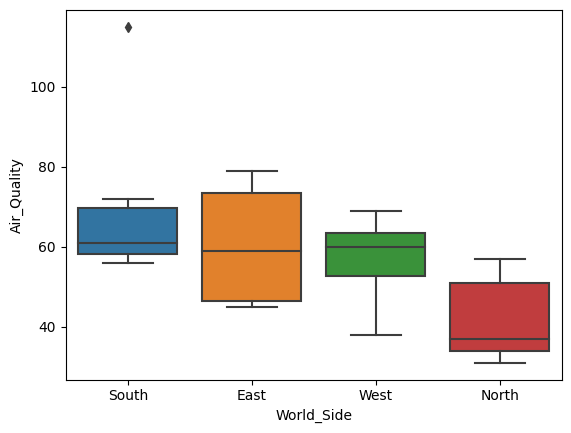

In [20]:
sns.boxplot(x='world_side', y='air_quality', data=newdf)
plt.xlabel('World_Side'), plt.ylabel('Air_Quality')
# North side of Germany has the best air quality (the lower number the better quality)

In [21]:
newdf[newdf['air_quality_by_city']=='best'].loc[:, ['city', 'world_side', 'air_quality']].sort_values('air_quality') 
# Cities in Germany with the best air quality (the lower number the better quality)

,city,world_side,air_quality
12,Kiel,North,31
8,Hanover,North,34
15,Bremen,North,37
19,Bielefeld,West,38
24,Potsdam,East,45
21,Koblenz,West,46
23,Jena,East,46
25,Erfurt,East,47
22,Lubeck,North,51
11,Dortmund,West,55


<AxesSubplot: xlabel='world_side', ylabel='free_money'>

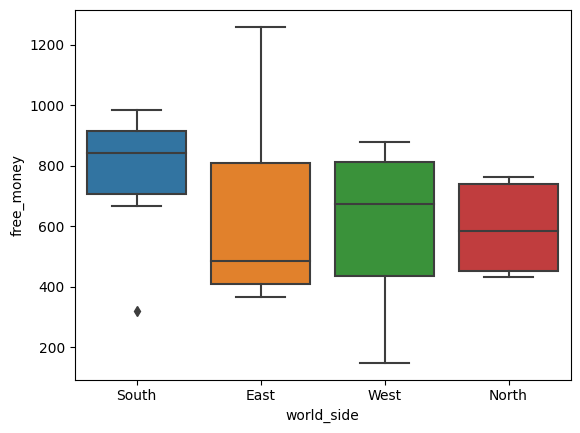

In [22]:
sns.boxplot(x='world_side', y='free_money', data=newdf)
# In most cases, working in Southern Germany you'll have more free money, with the exception of Munich 

<AxesSubplot: xlabel='world_side', ylabel='salary_net'>

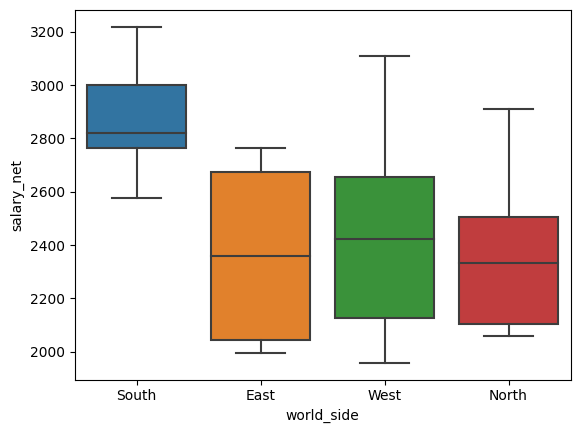

In [23]:
sns.boxplot(x='world_side', y='salary_net', data=newdf)
# The highest salary in South side

<AxesSubplot: xlabel='density', ylabel='expenses'>

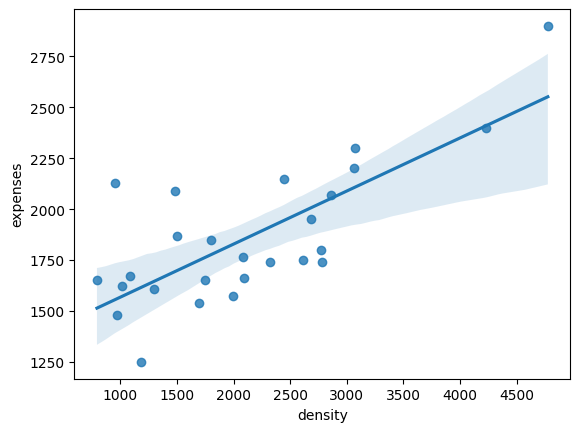

In [24]:
sns.regplot(x='density', y='expenses', data=newdf)
# The higher population the higher expenses. Positive correlation 0.75

<AxesSubplot: xlabel='density', ylabel='population_mm'>

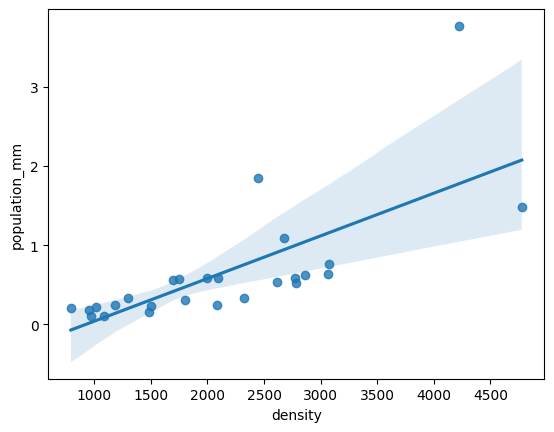

In [25]:
sns.regplot(x='density', y='population_mm', data=newdf)
# The higher density, the higher population. Positive correlation 0.71

In [26]:
# newdf.to_excel('Final_data.xlsx', index=False)